In [1]:
using Pkg; Pkg.activate(".")
using Distributions
using LinearAlgebra
using Plots
using Printf
using QuadGK
using StatsBase

Activating environment at `~/Code/julia/stats_with_julia/Project.toml`


# Probability Distributions

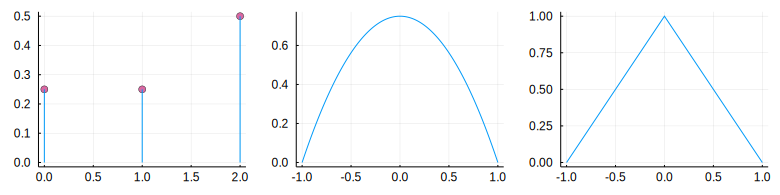

In [2]:
pDiscrete = [0.25, 0.25, 0.5]
xGridD = 0:2

pContinuous(x) = 3/4*(1 - x^2)
xGridC = -1:0.01:1

pContinuous2(x) = x < 0 ? x+1 : 1-x

p1 = plot(xGridD, pDiscrete, line=:stem, marker=:circle)
p2 = plot(xGridC, pContinuous.(xGridC))
p3 = plot(xGridC, pContinuous2.(xGridC))

plot(p1, p2, p3, layout=(1,3), size=(780, 780/4), legend=false)

# Moments

The *first moment about zero* is the mean, or expected value:

$$\textrm{E}(x) = \int_{-\infty}^{\infty} (x-0)^1\ \textrm{p}(x)\ dx = \int_{-\infty}^{\infty} x\ \textrm{p}(x)\ dx$$

The *second central moment* is the variance:

$$\textrm{Var}(x) = \int_{-\infty}^{\infty} (x-\textrm{E}(x))^2\ \textrm{p}(x)\ dx$$

In [3]:
pDiscreteMean = sum(xGridD[i] * pDiscrete[i] for i in 1:length(pDiscrete))
pContinuousMean = quadgk(x -> x*pContinuous(x), -1, 1)[1]
pContinuous2Mean = quadgk(x -> x*pContinuous2(x), -1, 1)[1]

println("pDiscrete    mean: $pDiscreteMean")
println("pContinuous  mean: $pContinuousMean")
println("pContinuous2 mean: $pContinuous2Mean")

pDiscrete    mean: 1.25
pContinuous  mean: 0.0
pContinuous2 mean: -2.0816681711721685e-17


In [4]:
pDiscreteVar = sum((xGridD[i] - pDiscreteMean)^2 * pDiscrete[i] for i in 1:length(pDiscrete))
pContinuousVar = quadgk(x -> (x - pContinuousMean)^2 * pContinuous(x), -1, 1)[1]
pContinuous2Var = quadgk(x -> (x - pContinuous2Mean)^2 * pContinuous2(x), -1, 1)[1]

println("pDiscrete    variance: $pDiscreteVar")
println("pContinuous  variance: $pContinuousVar")
println("pContinuous2 variance: $pContinuous2Var")

pDiscrete    variance: 0.6875
pContinuous  variance: 0.20000000000000004
pContinuous2 variance: 0.16666666666666669


# Probability Distribution Functions

## Basic
- Probability Mass Function (PMF)
- Probability Density Function (PDF)
- Cumulative Distribution Function (CDF)
- Complementary Cumulative Distribution Function (CCDF)
- Inverse Cumulative Distribution Function

## Advanced
- Moment Generating Function (MGF)
- Probability Generating Function (PGF)
- Characteristic Function (CF)

# Discrete Distributions

# Discrete Uniform Distribution

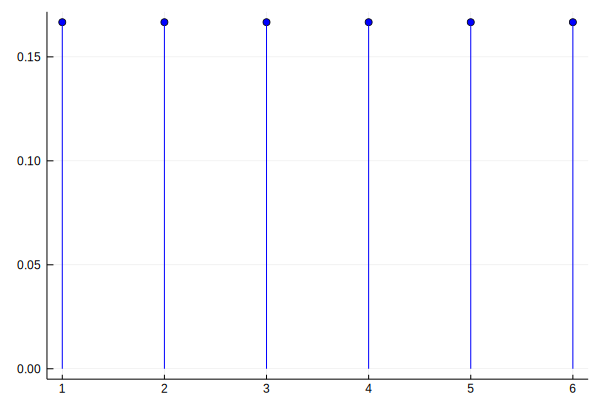

In [5]:
d = DiscreteUniform(1, 6)
plot(1:6, x -> pdf(d, x),
    color=:blue, marker=:circle, line=:stem, legend=false)

# Binomial Distribution

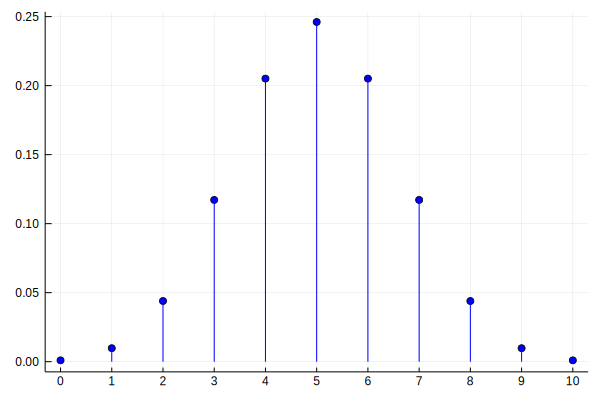

In [6]:
d = Binomial(10, 0.5)
plot(0:10, x -> pdf(d, x),
    color=:blue, marker=:circle, line=:stem, legend=false, xticks=0:10)

# Geometric Distribution

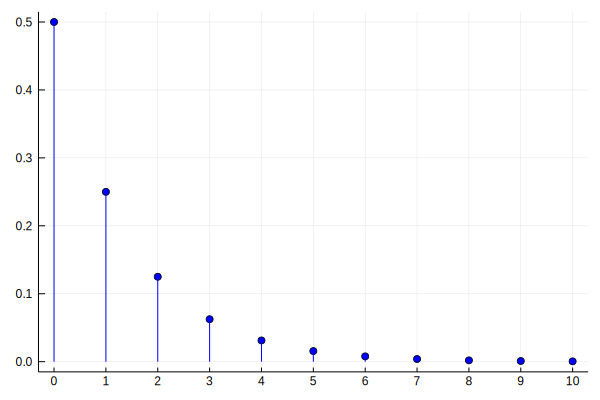

In [7]:
d = Geometric(0.5)
plot(0:10, x -> pdf(d, x),
    color=:blue, marker=:circle, line=:stem, legend=false, xticks=0:10)

# Negative Binomial Distribution

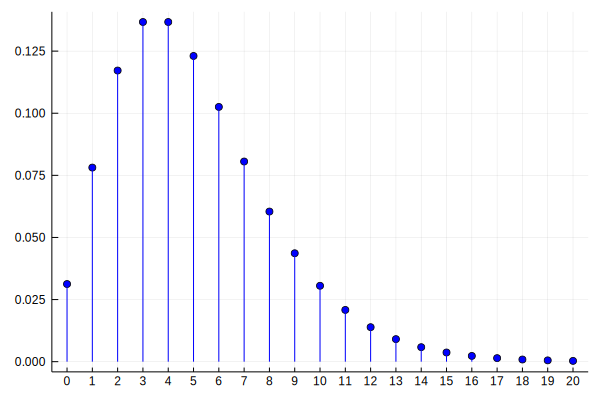

In [8]:
d = NegativeBinomial(5, 0.5)
plot(0:20, x -> pdf(d, x),
    color=:blue, marker=:circle, line=:stem, legend=false, xticks=0:20)

# Hypergeometric Distribution

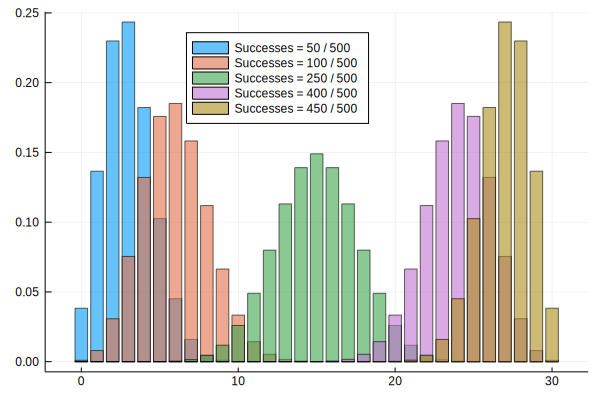

In [9]:
ks = [50, 100, 250, 400, 450]
ds = [Hypergeometric(k, 500-k, 30) for k in ks]
xGrid = 0:30
pmfs = [pdf.(d, xGrid) for d in ds]
labels = ["Successes = $k / 500" for k in ks]

bar(xGrid, pmfs, alpha=0.6, label=reshape(labels, (1, :)), legend=:top)

┌ Info: Saved animation to 
│   fn = /home/buttons/Code/julia/stats_with_julia/gifs/hypergeometric_approaches_binomial.gif
└ @ Plots /home/buttons/.julia/packages/Plots/12uaJ/src/animation.jl:98


Plots.AnimatedGif("/home/buttons/Code/julia/stats_with_julia/gifs/hypergeometric_approaches_binomial.gif")
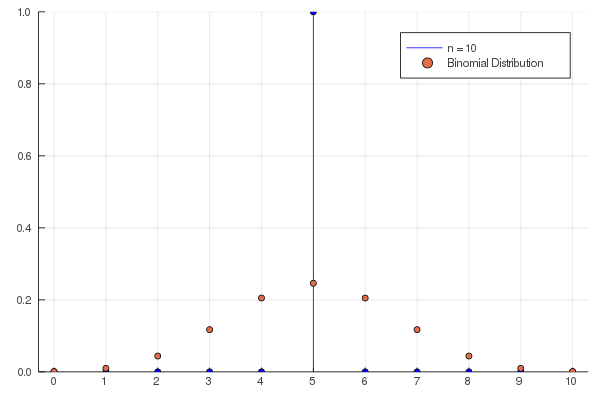

In [10]:
anim = Animation()
for n in [10, 12, 14, 16, 20, 24, 30, 40, 60, 80, 120, 200, 500, 1000]
    d = Hypergeometric(n/2, n/2, 10)
    plot(0:10, x -> pdf(d, x),
        color=:blue, marker=:circle, line=:stem,
        xticks=0:10, ylims=(0, 1),
        label="n = $n")
    scatter!(0:10, x -> pdf(Binomial(10, 0.5), x), label="Binomial Distribution")
    frame(anim)
end
gif(anim, "gifs/hypergeometric_approaches_binomial.gif", fps=1)

# Poisson Distribution

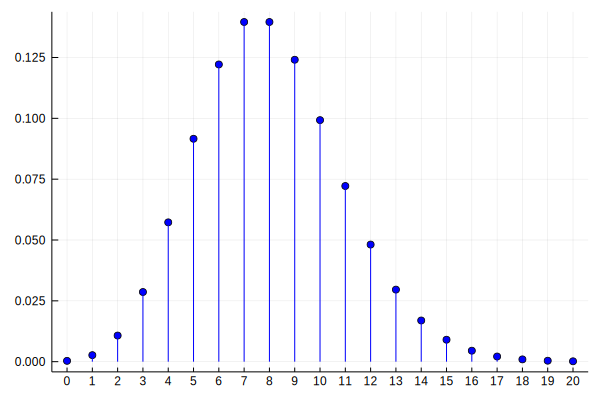

In [11]:
d = Poisson(8)
plot(0:20, x -> pdf(d, x),
    color=:blue, marker=:circle, line=:stem, legend=false, xticks=0:20)

# Continuous Distributions

# Continuous Uniform Distribution

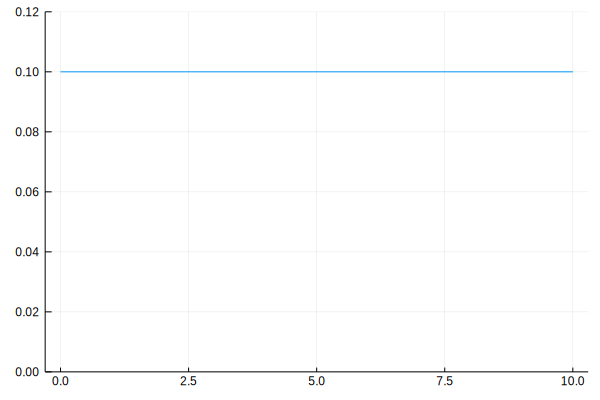

In [12]:
d = Uniform(0, 10)
plot(0:0.01:10, x -> pdf(d, x), ylims=(0, 0.12), label=false)

# Exponential Distribution

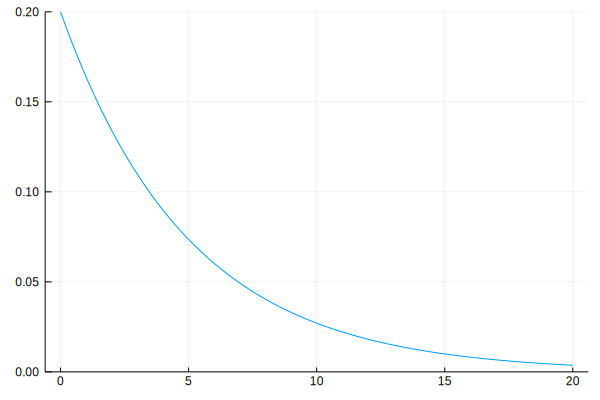

In [13]:
d = Exponential(5)
plot(0:0.01:20, x -> pdf(d, x), ylims=(0, 0.2), label=false)

In [14]:
d = Exponential(5)
es = rand(d, 10^6)
println("estimated mean:   ", mean(es))
println("actual    mean:   ", quadgk(x -> x * pdf(d, x), 0, 1000)[1])
println("estimated median: ", median(es))
println("actual    median: ", quantile(d, 0.5))
@printf("sample    range:  %.3f - %.3f\n", minimum(es), maximum(es))

estimated mean:   4.99872505566553
actual    mean:   5.000000000000001
estimated median: 3.4728342438159236
actual    median: 3.4657359027997265
sample    range:  0.000 - 62.837


# Gamma Distribution

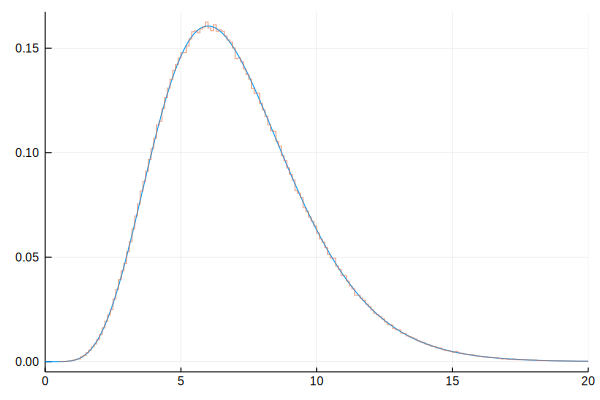

In [15]:
α = 7
λ = 1

d = Gamma(α, λ)
plot(0:0.01:20, x -> pdf(d, x), legend=false)

mc = [sum(rand(Exponential(λ), α)) for _ in 1:10^6]
stephist!(mc, xlims=(0, 20), alpha=0.6, normed=true)

# Beta Distribution

┌ Info: Saved animation to 
│   fn = /home/buttons/Code/julia/stats_with_julia/gifs/beta_distribution.gif
└ @ Plots /home/buttons/.julia/packages/Plots/12uaJ/src/animation.jl:98


Plots.AnimatedGif("/home/buttons/Code/julia/stats_with_julia/gifs/beta_distribution.gif")
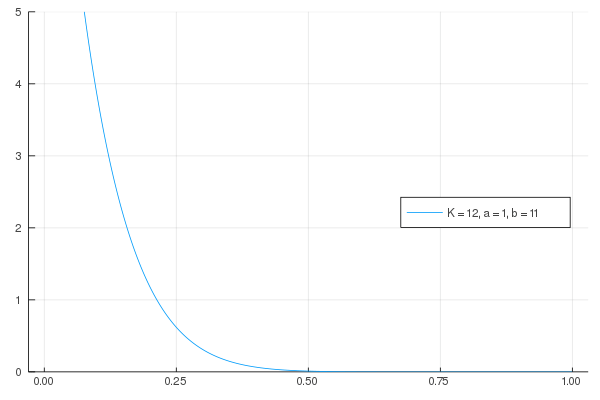

In [16]:
anim = Animation()
for k_multiplier in [1, 3]
    for i in 0:10
        i = i * k_multiplier
        a = i+1
        b = 10*k_multiplier-i+1
        k = a + b
        d = Beta(a, b)
        plot(0:0.001:1, x -> pdf(d, x),
            ylims=(0, 5), legend=:right, label="K = $k, a = $a, b = $b")
        frame(anim)
    end
end
gif(anim, "gifs/beta_distribution.gif", fps=1)

# Weibull Distribution

Models "time-to-failure" when the failure rate is proportional to a power of time.

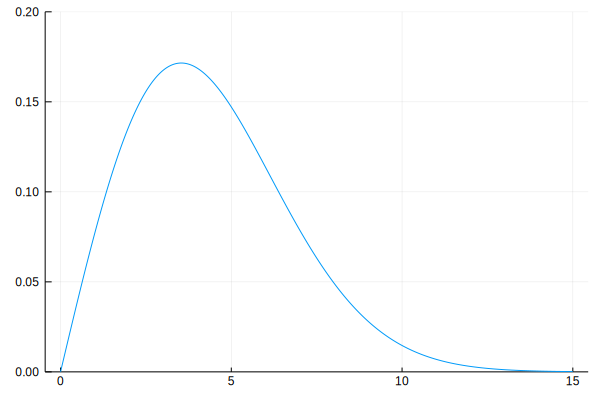

In [17]:
d = Weibull(2, 5)
plot(0:0.01:15, x -> pdf(d, x), ylims=(0, 0.2), label=false)

# Gaussian (Normal) Distribution

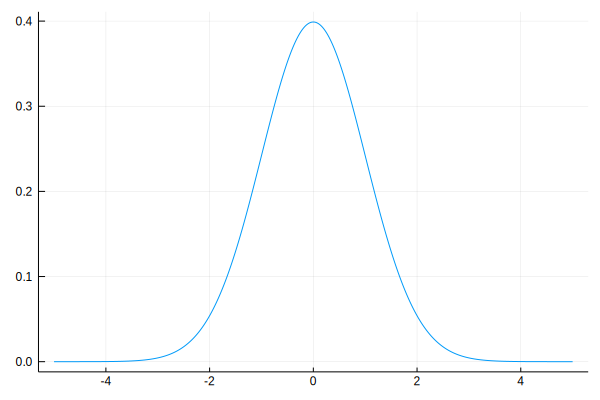

In [18]:
d = Normal(0, 1)
plot(-5:0.01:5, x -> pdf(d, x), label=false)

# Reyleigh Distribution

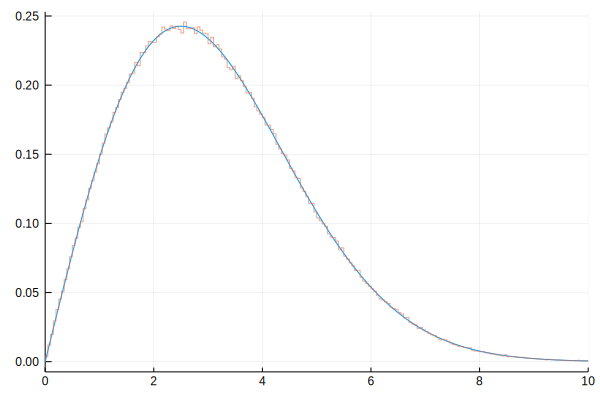

In [19]:
σ = 2.5
d = Rayleigh(σ)
plot(0:0.01:10, x -> pdf(d, x), legend=false)

N = 10^6
nd = Normal(0, σ)
mc = norm.(zip(rand(nd, N), rand(nd, N)))
stephist!(mc, xlims=(0, 10), alpha=0.6, normed=true)

# Cauchy Distribution

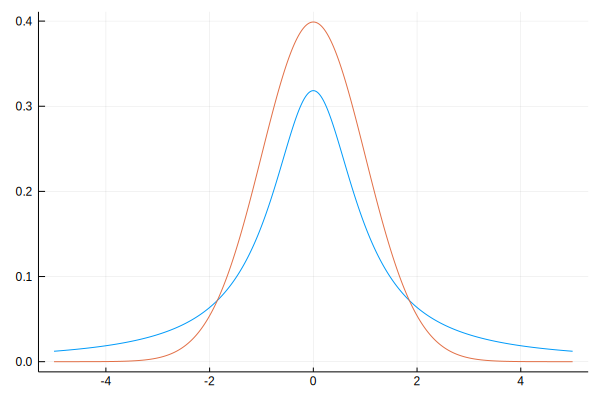

In [20]:
u = 0
b = 1
d = Cauchy(u, b)
plot(-5:0.01:5, x -> pdf(d, x), legend=false)
plot!(-5:0.01:5, x -> pdf(Normal(u, b), x), legend=false)

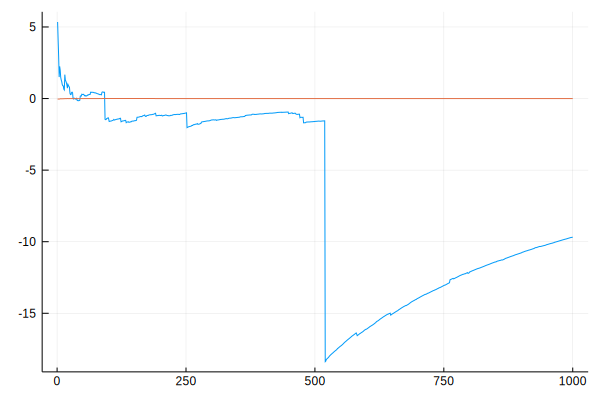

In [21]:
u = 0
b = 1
cd = Cauchy(u, b)
nd = Normal(u, b)

function rolling_mean(d)
    ns = Float32[]
    means = Float32[]
    for _ in 1:1000
        append!(ns, rand(d, 1000))
        push!(means, mean(ns))
    end
    means
end

plot(rolling_mean(cd), legend=false)
plot!(rolling_mean(nd), legend=false)